In [3]:
import pandas as pd
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759) 
  
# data (as pandas dataframes) 
X = glioma_grading_clinical_and_mutation_features.data.features 
y = glioma_grading_clinical_and_mutation_features.data.targets 

In [5]:
print("\nColumn Data Types:")
print(X.dtypes)


Column Data Types:
Gender                int64
Age_at_diagnosis    float64
Race                 object
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object


In [9]:
mapping = {
    'white': 0,
    'black or african american': 1,
    'asian': 2,
    'american indian or alaska native': 3
}

# Apply mapping
X['Race'] = X['Race'].str.lower().map(mapping)

/var/folders/hf/3rv_98fd6y5b8tx745n5n1s00000gn/T/ipykernel_38474/1873573100.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Race'] = X['Race'].str.lower().map(mapping)


In [11]:
## Looking at null values in the dataset
print(X.isna().sum().sum())

# No null values

0


# Descriptive stats

## Gender 

In [15]:
gender_mapping = {0 : 'Male', 1 : 'Female'}

In [17]:
# Descriptive statistics by Sex - Count the number of males (0) and females (1)
sex_counts = X['Gender'].value_counts()
print("\nSex Counts:")
sex_counts = pd.DataFrame(sex_counts).reset_index(drop = True)
print(sex_counts)

# Calculate proportions for each sex
sex_proportions = X['Gender'].value_counts(normalize=True)
print("\nSex Proportions:")
sex_proportions = pd.DataFrame(sex_proportions).reset_index(drop = True)
print(sex_proportions)


Sex Counts:
   count
0    488
1    351

Sex Proportions:
   proportion
0    0.581645
1    0.418355


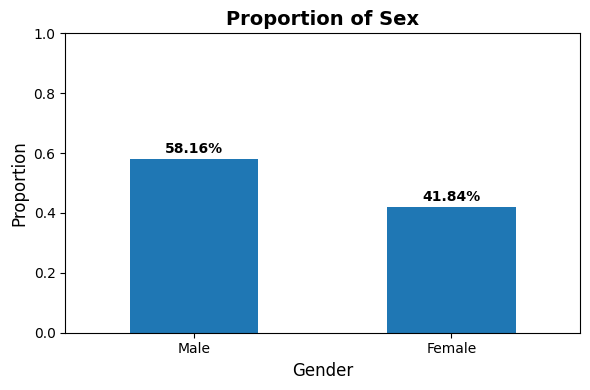

In [19]:
# Assign Gender Labels
sex_proportions.index = ["Male", "Female"]  # Adjust based on data order

# Plot the bar chart
sex_proportions.plot(kind='bar', legend=False, figsize=(6,4))

# Titles and Labels
plt.title("Proportion of Sex", fontsize=14, fontweight='bold')
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.xticks(rotation = 0)
plt.ylim(0, 1)  

# Show values on bars
for i, v in enumerate(sex_proportions["proportion"]):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()


Males = 0 and Females = 1.
58% Males and 41% Females in the dataset, skewed towards Males within the dataset.

## Gender stratified by age

In [23]:
# Group by sex and calculate mean and standard deviation
grouped_stats = X.groupby('Gender')['Age_at_diagnosis'].mean()
print("\nAge at diagnosis Mean Values by Sex:")
print(grouped_stats)

grouped_stats_std = X.groupby('Gender')['Age_at_diagnosis'].std()
print("\nAge at diagnosis Standard Deviation by Sex:")
print(grouped_stats_std)


Age at diagnosis Mean Values by Sex:
Gender
0    51.152848
1    50.633105
Name: Age_at_diagnosis, dtype: float64

Age at diagnosis Standard Deviation by Sex:
Gender
0    15.810747
1    15.567814
Name: Age_at_diagnosis, dtype: float64


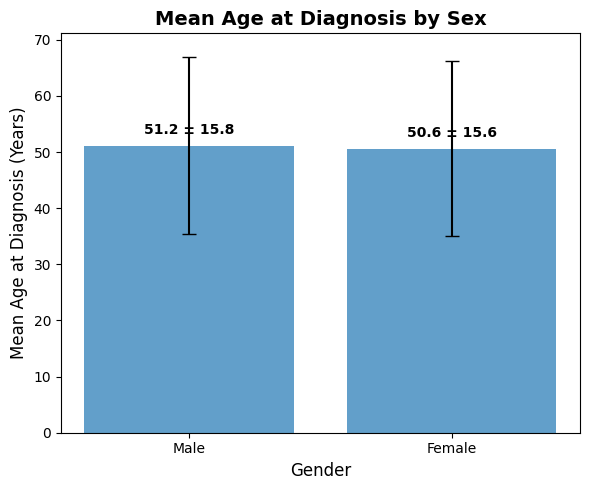

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Gender Labels
gender_labels = ["Male", "Female"]

# Mean Age at Diagnosis
mean_age = [51.152848, 50.633105]

# Standard Deviation
std_dev = [15.810747, 15.567814]

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(gender_labels, mean_age, yerr=std_dev, capsize=5, alpha=0.7)

# Labels and title
plt.title("Mean Age at Diagnosis by Sex", fontsize=14, fontweight='bold')
plt.ylabel("Mean Age at Diagnosis (Years)", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.ylim(0, max(mean_age) + 20)  # Extend limit to make space for error bars

# Show value labels on bars
for i, v in enumerate(mean_age):
    plt.text(i, v + 2, f"{v:.1f} ± {std_dev[i]:.1f}", ha='center', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

Age at diagnosis looks visually evenly distributed across the genders (mean and std)

## Age 

In [33]:
X['Age_at_diagnosis'].describe()

count    839.000000
mean      50.935411
std       15.702339
min       14.420000
25%       38.055000
50%       51.550000
75%       62.800000
max       89.290000
Name: Age_at_diagnosis, dtype: float64

*Age distribution:*
- Mean age = 50.9
- Min age = 14.4
- Max age = 89.3


Large proportion of patients are aged between ~30 - 65, which fits with the literature that the tumours appear after 45

In [36]:
# Putting the age into clinical categories for stratification
# paedritic = under 18
# Young adult = 19 - 30
# Adult = 31 - 65
# Elderly = 65+


def categorise_age(age):
    if age <= 19:
        return "Paediatric"
    elif 20 <= age <= 39:
        return "Young Adult"
    elif 40 <= age <= 64:
        return "Adult"
    else:
        return "Elderly"

X['Age_class_at_diagnosis'] = X['Age_at_diagnosis'].apply(categorise_age)

X['Age_class_at_diagnosis'].value_counts()

/var/folders/hf/3rv_98fd6y5b8tx745n5n1s00000gn/T/ipykernel_38474/559880556.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age_class_at_diagnosis'] = X['Age_at_diagnosis'].apply(categorise_age)


Age_class_at_diagnosis
Adult          403
Young Adult    228
Elderly        206
Paediatric       2
Name: count, dtype: int64

Not many paediatic cases. Main population is adult (bigger age range)

## Race

In [40]:
race_mapping = {0 : 'White', 1 : 'Black and African American', 2 : 'Asian', 3 : 'Indian American or native alaska'}

In [42]:
X['Race'].value_counts()

Race
0    765
1     59
2     14
3      1
Name: count, dtype: int64

In [44]:
X[X['Race'] == 3]
y.iloc[463]

Grade    0
Name: 463, dtype: int64

No mutations found with a low grade glioma - however nothing to be compared to as only one piece of evidence for american indian or alaska natives population within the dataset

Literature has a very small proportion of the populations were America Indian or alaska natives:
https://pmc.ncbi.nlm.nih.gov/articles/PMC6744292/
- 325 / 80,763 gliomas 
- Demographic was not included in the rest of the analysis, just the stratificiation of socioeconomic status where there was no significant difference between the people with high SES and low SES

## Mutation distribution

In [48]:
mutation_columns = ["IDH1", "TP53", "ATRX", "PTEN", "EGFR", "CIC", "MUC16", "PIK3CA", 
                    "NF1", "PIK3R1", "FUBP1", "RB1", "NOTCH1", "BCOR", "CSMD3", "SMARCA4", 
                    "GRIN2A", "IDH2", "FAT4", "PDGFRA"]

mutation_columns

['IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

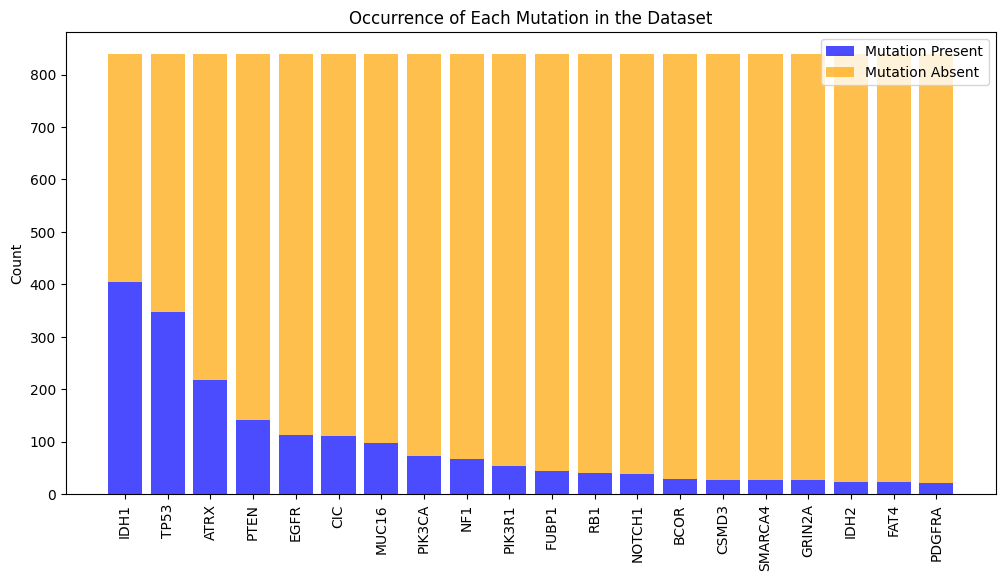

In [50]:
mutation_counts = X.iloc[:, 3:-1].sum()
no_mutation_counts = len(X) - mutation_counts

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mutation_counts.index, mutation_counts, label="Mutation Present", alpha=0.7, color='blue')
plt.bar(no_mutation_counts.index, no_mutation_counts, bottom=mutation_counts, label="Mutation Absent", alpha=0.7, color='orange')

plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Occurrence of Each Mutation in the Dataset")
plt.legend()
plt.show()

Genes with the high mutations in the dataset are:
- IDH1  
- TP53
- ATRX

## Mutation distributions - sex

In [54]:
mutation_sex_counts = X.groupby('Gender')[mutation_columns].sum()

mutation_sex_percentage = mutation_sex_counts.iloc[:, 0:].div(mutation_sex_counts.sum(axis=1), axis=0) * 100

mutation_sex_percentage.reset_index()

,Gender,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,20.699172,18.583257,10.671573,8.003680,6.439742,5.151794,5.059798,3.955842,3.679853,...,2.299908,1.931923,2.023919,1.011960,1.195952,1.471941,1.471941,1.103956,0.827967,1.011960
1,1,21.334923,17.401669,12.038141,6.436234,5.005959,6.555423,5.125149,3.575685,3.218117,...,2.383790,2.264601,1.907032,2.145411,1.668653,1.311085,1.311085,1.311085,1.668653,1.311085


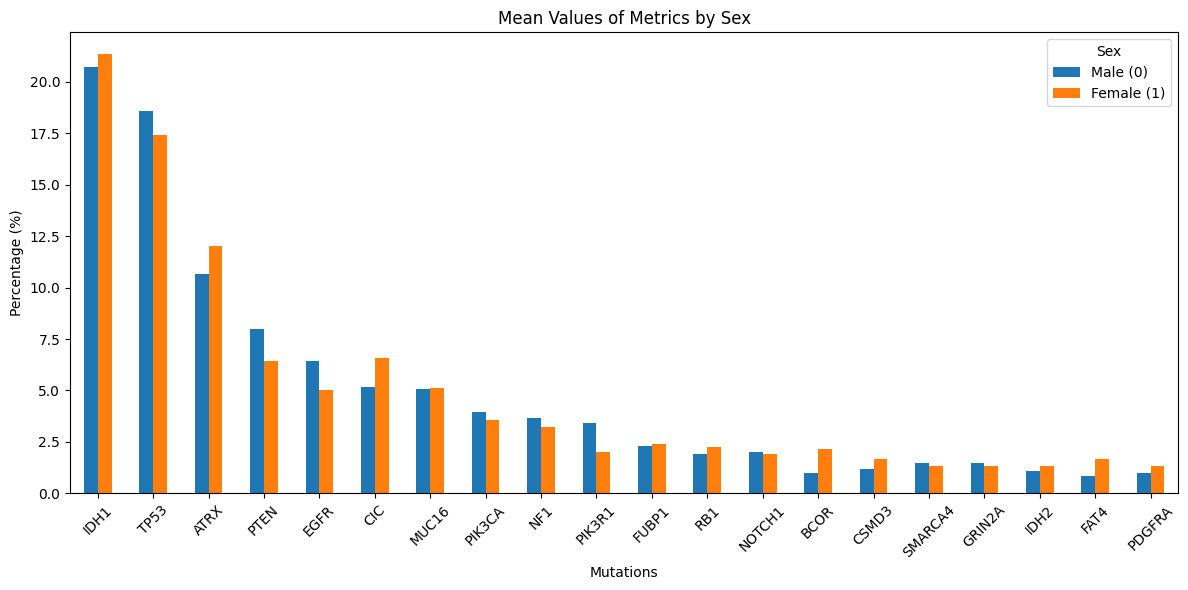

In [56]:
# Plot mean values
mutation_sex_percentage.T.plot(kind='bar', figsize=(12, 6))
plt.title("Mean Values of Metrics by Sex")
plt.ylabel("Percentage (%)")
plt.xlabel("Mutations")
plt.xticks(rotation=45)
plt.legend(["Male (0)", "Female (1)"], title="Sex")
plt.tight_layout()
plt.show()

- Relatively similar mutation frequency of each gene between the genders
- No clear pattern of a lower frequency of mutations in men or women

## Mutation distribution - race

In [60]:
mutation_race_counts = X.groupby('Race')[mutation_columns].sum().reset_index()

In [62]:
mutation_race_percentage = mutation_race_counts.iloc[:, 1:].div(mutation_race_counts.sum(axis=1), axis=0) * 100
mutation_race_percentage.reset_index()

,index,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,21.380471,18.350168,11.279461,7.014590,5.499439,5.892256,4.882155,3.591470,3.367003,...,2.413019,2.132435,2.076319,1.515152,1.515152,1.459035,1.459035,1.178451,1.234568,1.178451
1,1,12.500000,15.000000,10.833333,12.500000,10.833333,3.333333,8.333333,6.666667,5.000000,...,1.666667,1.666667,0.000000,1.666667,0.000000,0.000000,0.833333,1.666667,0.833333,0.833333
2,2,29.629630,11.111111,11.111111,3.703704,3.703704,7.407407,3.703704,3.703704,3.703704,...,0.000000,0.000000,3.703704,0.000000,0.000000,3.703704,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


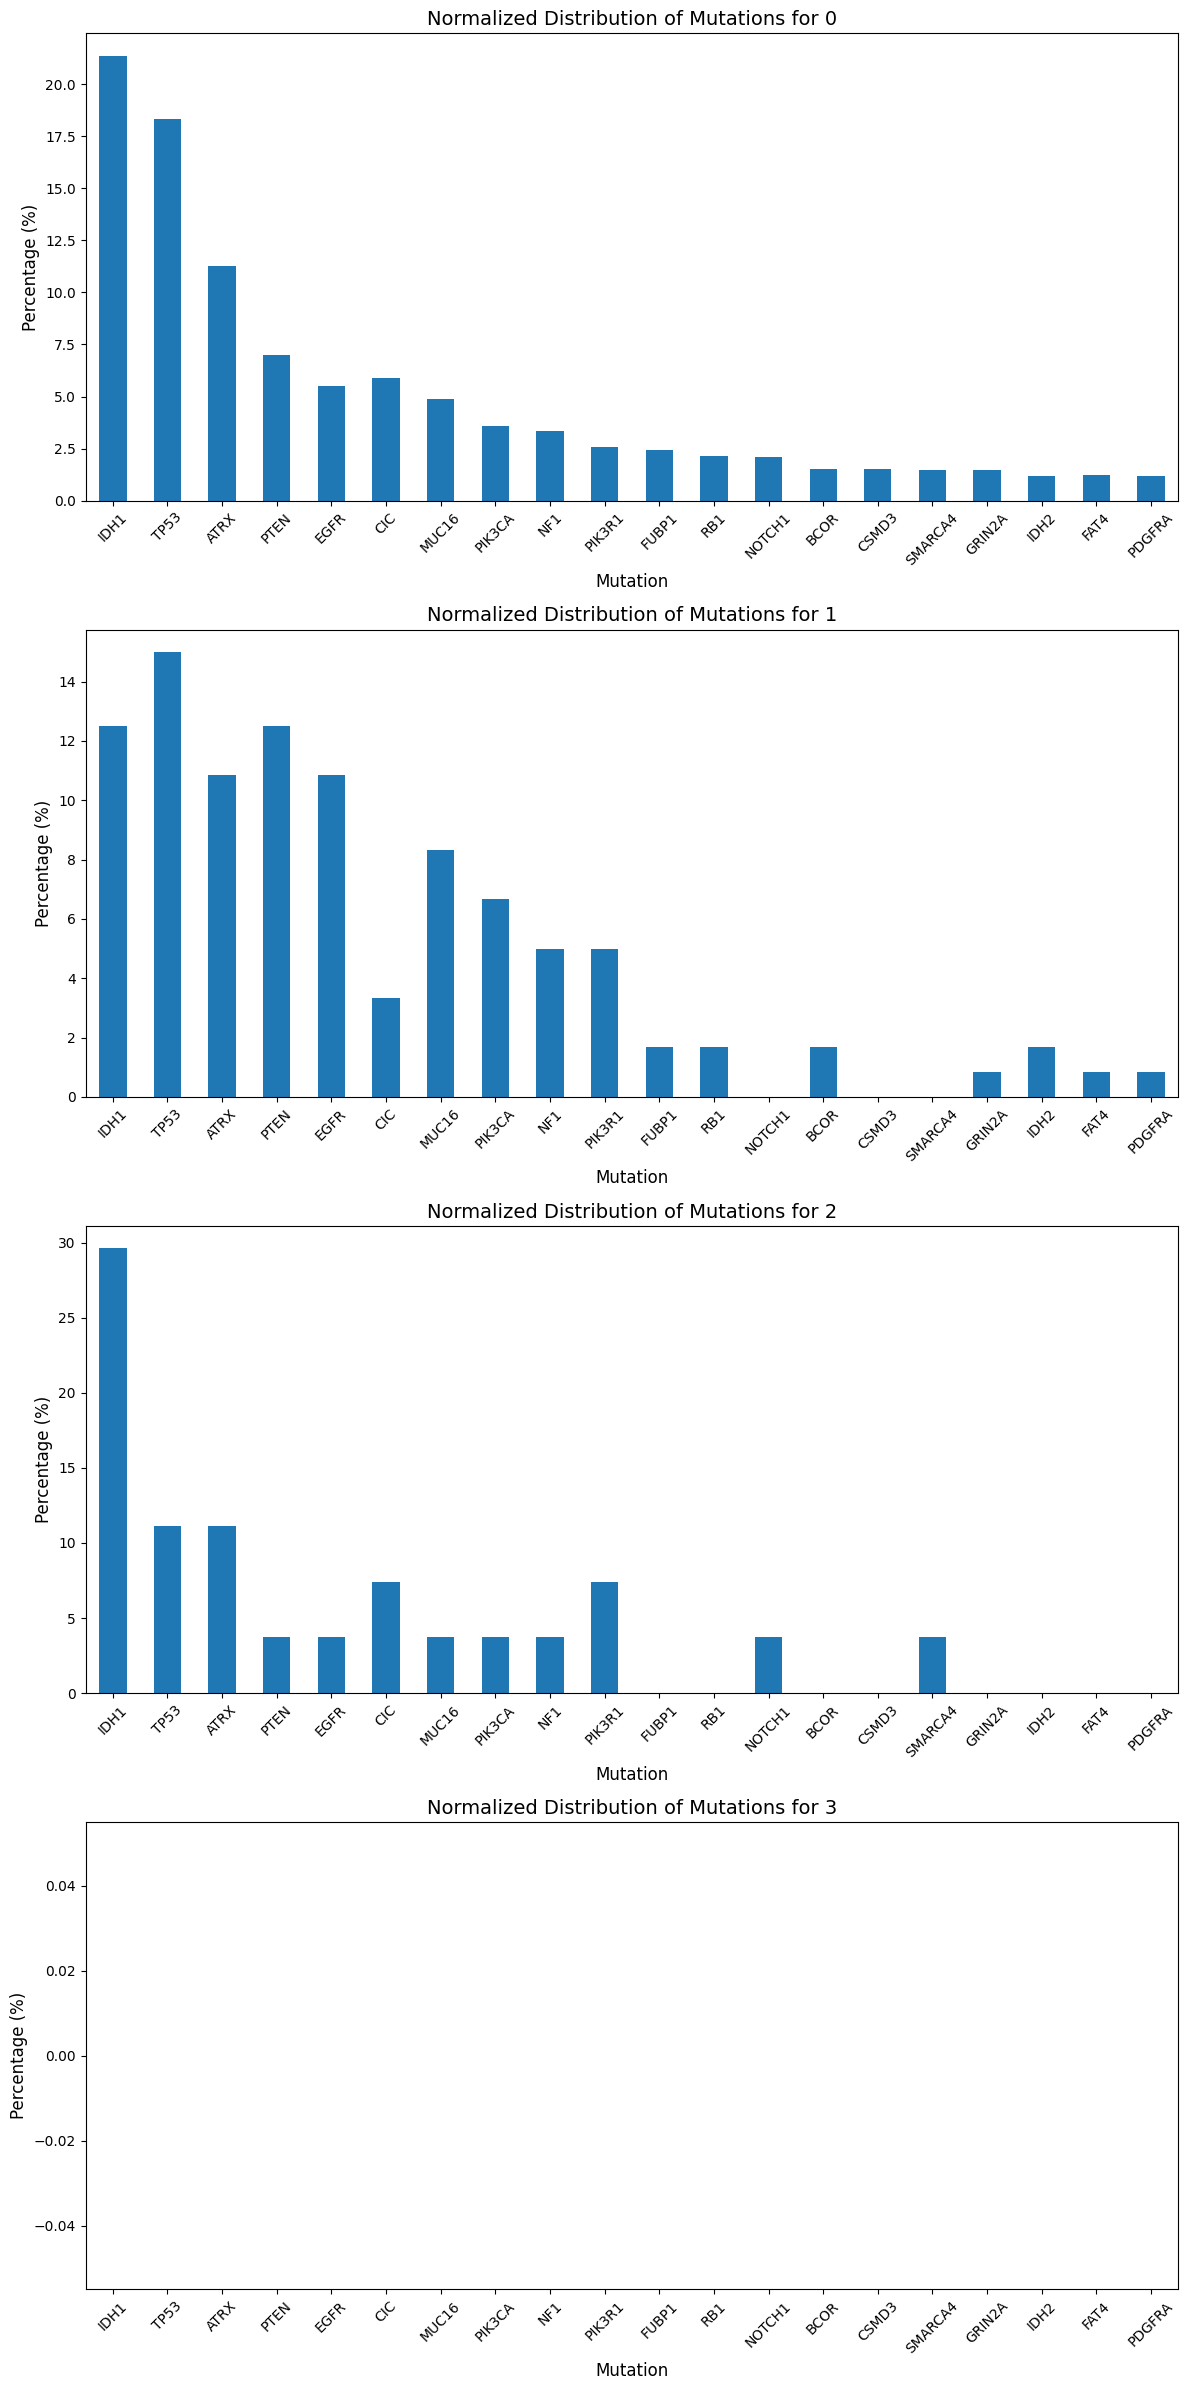

In [64]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=len(mutation_race_percentage.index), figsize=(12, 6 * len(mutation_race_percentage.index)))

for i, race in enumerate(mutation_race_percentage.index):
    ax = axes[i] if len(mutation_race_percentage.index) > 1 else axes  # Handle single row case
    mutation_race_percentage.loc[race].plot(kind="bar", ax=ax)

    ax.set_xticklabels(mutation_race_percentage.columns, rotation=45)
    ax.set_title(f"Normalized Distribution of Mutations for {race}", fontsize=14)
    ax.set_xlabel("Mutation", fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)

plt.tight_layout()
plt.show()

**Mutations**

- White population has all the mutations present 

Black and african american population does not have the:
- NOTCH1
- CSMD3
- SMARCA4

Asian population does not have the:
- FUBP1
- RB1
- BCOR
- CSMD3
- GRIN2A
- IDH2
- FAT4
- PDGFRA

American indian and alaskan native (1 person) had no mutations



***Literature identified the features (mutations) with the best results (accuracy of clinical grading) were:***
- CIC
- IDH1
- PTEN
- ATRX
- PIK3R1
- NF1
- IDH2, missing from Asian population
- GRIN2A, missing from Asian population
- NOTCH1, missing from black and african american population
- TP53
- EGFR
- MUC16

= All missing from indian american and alska native

TP53 found to be one of the most common mutations in most of the races (Except American Indian or Alaska Natives)
- Aligns with literature as it is frequently mutated in gliomas
- Has a mechanistic connection to PTEN and GRIN2A (GRIN2A mutation is missing in the Asian population so contradicts literature)

## Mutational distributions by popualtions of race and gender 

In [68]:
mutation_counts = X.groupby(['Race', 'Gender'])[mutation_columns].sum()
mutation_percentage = mutation_counts.div(mutation_counts.sum(axis=1), axis=0) * 100
mutation_percentage.reset_index(inplace = True)
mutation_percentage.fillna(0, inplace = True)

mutation_percentage['Gender'] = mutation_percentage['Gender'].map(gender_mapping)
mutation_percentage['Race'] = mutation_percentage['Race'].map(race_mapping)

mutation_percentage['race_gender_demographic'] = mutation_percentage['Race'] + ', ' + mutation_percentage['Gender']

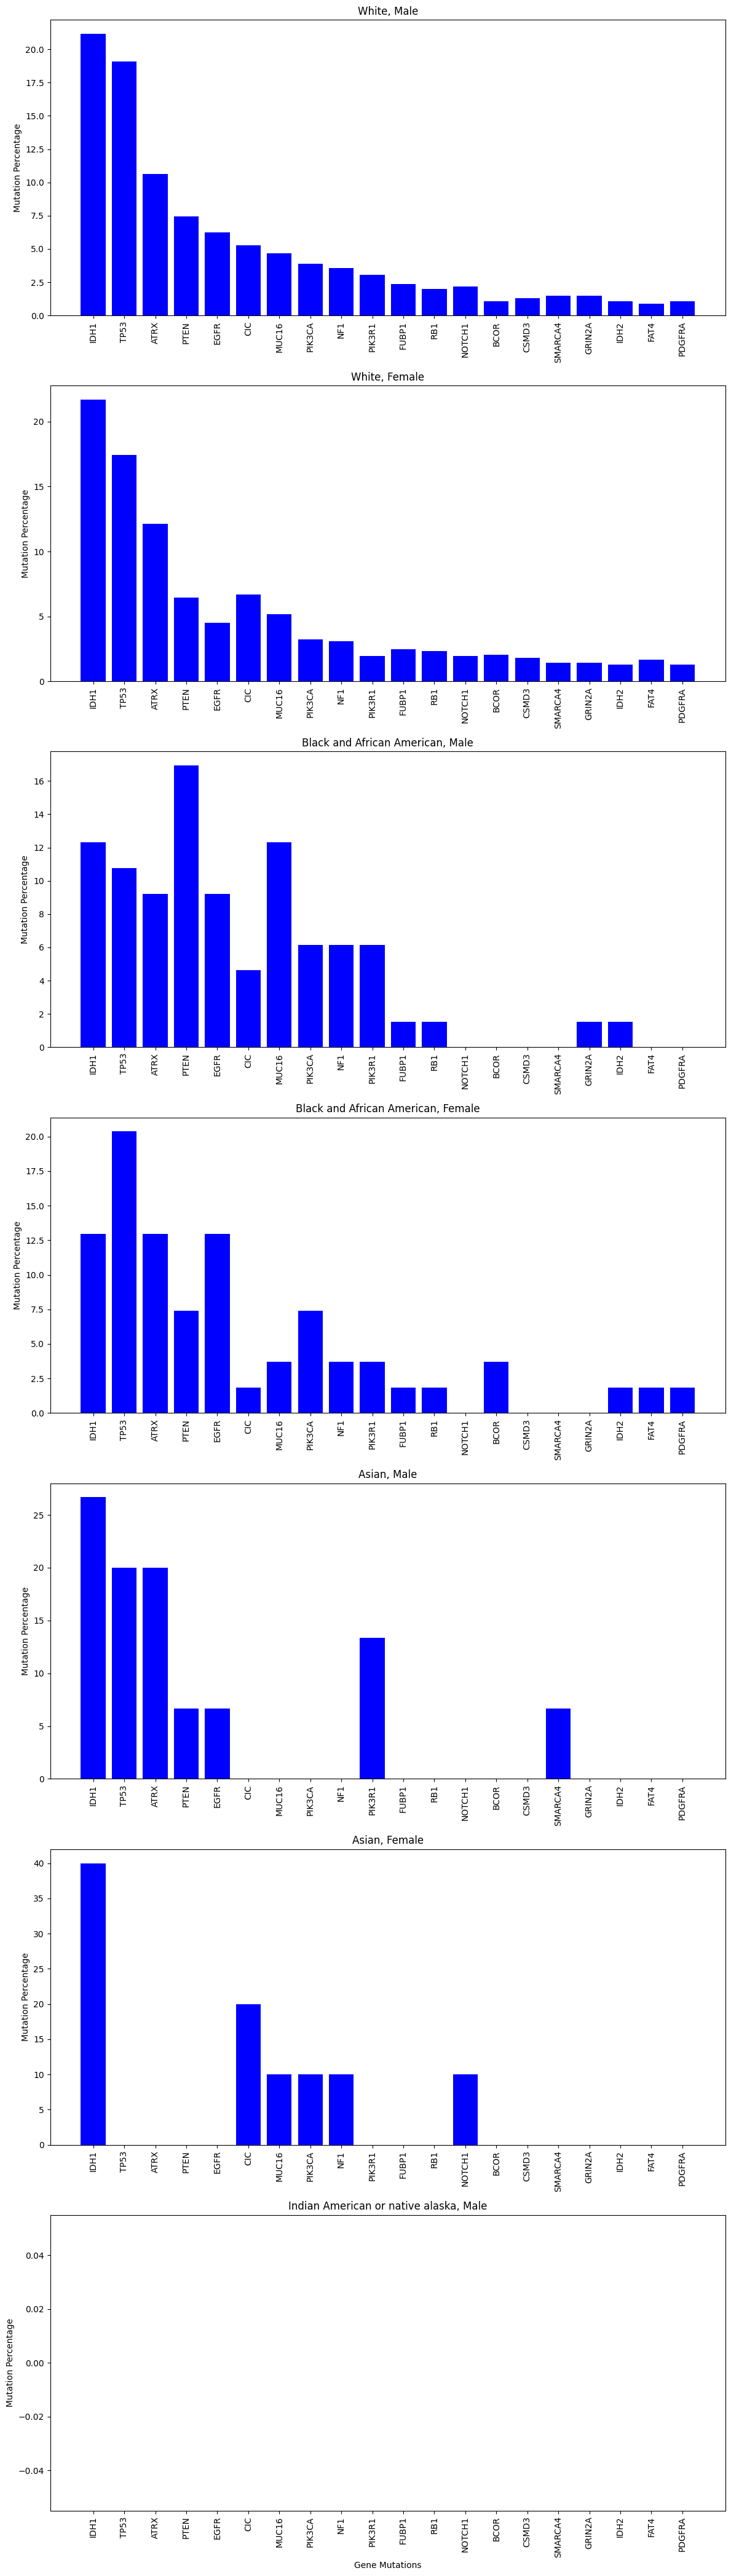

In [69]:
import matplotlib.pyplot as plt

# Keep race_gender_demographic before dropping columns
race_gender_labels = mutation_percentage['race_gender_demographic'].tolist()

# Drop unwanted columns
df = mutation_percentage.drop(columns=['Race', 'Gender', 'race_gender_demographic'])

# Plotting
fig, axes = plt.subplots(nrows=len(df.index), figsize=(12, 6 * len(df.index)), sharex=False)

for i, (index, values) in enumerate(df.iterrows()):
    axes[i].bar(df.columns, values, color='blue')
    axes[i].set_title(f"{race_gender_labels[i]}")
    axes[i].set_ylabel("Mutation Percentage")
    axes[i].set_xticks(range(len(df.columns)))
    axes[i].set_xticklabels(df.columns, rotation=90)

plt.xlabel("Gene Mutations")
plt.tight_layout()
plt.show()

*White male and female*
- Mutations were all present

*Black and african american males*
- NOTCH1, BCOR, CSMD3, SMARC4, FAT4 and PDGFRA mutations are not present

*Black and african american females*
- NOTCH1, CSMD3, SMARCA4, GRIN2A mutations are not present

*Asian Males*
- CIC, MUC16, PK3CA, NF1, FUBP1, RB1, NOTCH1, BCOR, CSMD3, GRIN2A, IDH2, FAT4, PDGFRA mutations are not present

*Asian Females*
- TP53, ATRX, PTEN, EGFR, PK3R1, FUBP1, RB1, BCOR, CSMD3, SMARCA4, GRINA2A, IDH2, FAT4, PDGFRA mutations are not present

*Indian american and alaska native*
- No mutations were present
- One entry for the popualtion in the dataset, which was a male = no data on females in this population

## Mutation distribution by glioma grading

In [74]:
X['Grading'] = y

grading_mapping = {0 : 'LGG', 1 : 'GBM'}

X['Grading'] = X['Grading'].map(grading_mapping)

In [75]:
X.groupby('Grading')[mutation_columns].sum()

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Grading,,,,,,,,,,,,,,,,,,,,
GBM,23,113,34,116,81,4,57,34,38,33,2,34,0,12,15,4,20,2,12,16
LGG,381,235,183,25,31,107,41,39,29,21,43,6,38,17,12,23,7,21,11,6


## Glioma grades
**LGG**
- IDH1 is most common in LGG tumours (aligns with literature)
- TP53, ATRX and CIC is also common - aligns with literature

**GBM**
- PTEN and TP53 is most common in GMB tumours (aligns with literature as they are mechanisitically linked)
- EGFR is also common - aligns with literature

### Demographic data with respect to glioma grading

In [122]:
## Age at diagnosis
X.groupby('Grading')['Age_at_diagnosis'].describe()

,count,mean,std,min,25%,50%,75%,max
Grading,,,,,,,,
GBM,352.0,60.703750,13.427080,21.73,52.665,61.395,69.995,89.29
LGG,487.0,43.874928,13.261726,14.42,33.530,41.610,53.745,87.00


In [81]:
X['Gender'] = X['Gender'].map(gender_mapping)
X['Race'] = X['Race'].map(race_mapping)
X['race_gender_demographic'] = X['Race'] + ', ' + X['Gender']

### Distribution of tumour grades by race

In [84]:
X.groupby('Race')['Grading'].value_counts().reset_index()

,Race,Grading,count
0,Asian,LGG,8
1,Asian,GBM,6
2,Black and African American,GBM,38
3,Black and African American,LGG,21
4,Indian American or native alaska,LGG,1
5,White,LGG,457
6,White,GBM,308


***White populations make up the majority of the dataset demographic - bias towards the more accurate clinical grading of tumours in that population compare to Asian, Black or Afican american and Indian american or alaska native populations***

- Similar numbers of LGG and GBM in Asian popualtion
- Black and African American population has a higher count of GMB than LGG tumour
- White population has a higher count of LGG tumour

### Distribution of tumour grades by gender

In [88]:
counts_gender = X.groupby(['Gender', 'Grading']).size().reset_index(name='count')
counts_gender['freq'] = counts_gender['count'] / counts_gender.groupby('Gender')['count'].transform('sum')

counts_gender

,Gender,Grading,count,freq
0,Female,GBM,135,0.384615
1,Female,LGG,216,0.615385
2,Male,GBM,217,0.444672
3,Male,LGG,271,0.555328


- More LGG present in both Male and Female groups
- Spread of the grading in each gender displays that tumour grading is more skew towards LGG in females than it is in males (only a ~6% difference)

### Race and gender stratification

In [92]:
Grading_race_gender_demo = X.groupby('race_gender_demographic')['Grading'].value_counts().reset_index()


# Calculate the total count per demographic
Grading_race_gender_demo["total"] = Grading_race_gender_demo.groupby("race_gender_demographic")["count"].transform("sum")

# Calculate the percentage
Grading_race_gender_demo["percentage"] = (Grading_race_gender_demo["count"] / Grading_race_gender_demo["total"]) * 100

# Drop the total column (not needed in final output)
Grading_race_gender_demo = Grading_race_gender_demo.drop(columns=["total"])

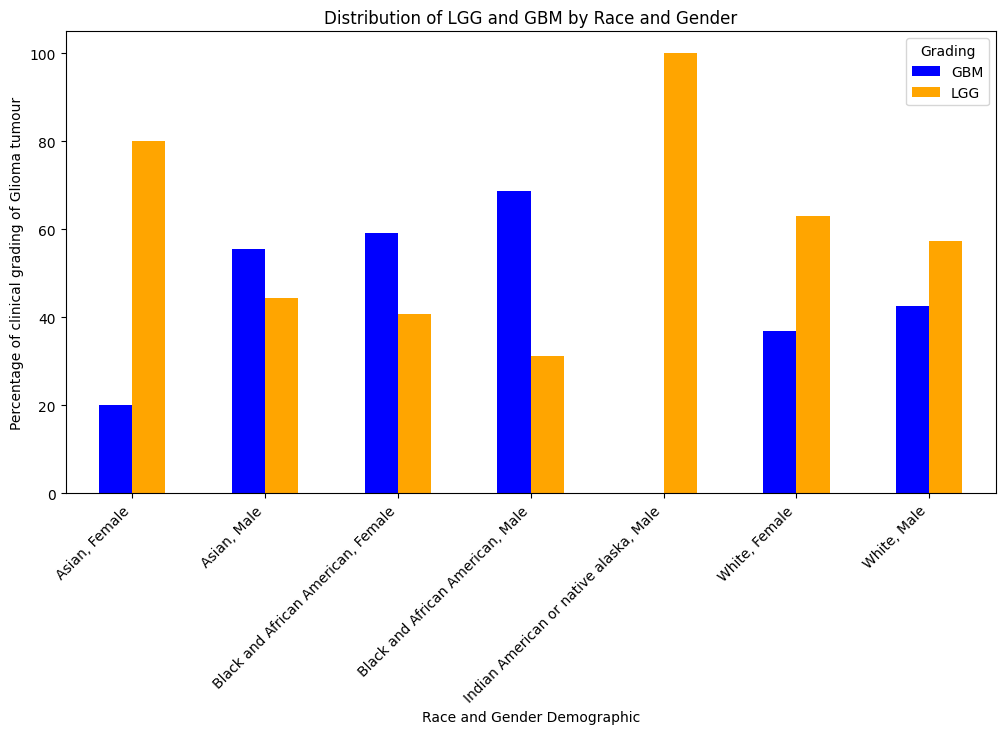

In [94]:
# Pivot the data for better visualization
Grading_race_gender_demo_pivot = Grading_race_gender_demo.pivot(index="race_gender_demographic", columns="Grading", values="percentage").fillna(0)

# Plotting
Grading_race_gender_demo_pivot.plot(kind="bar", figsize=(12, 6), color = ['blue', 'orange'])

# Labels and title
plt.xlabel("Race and Gender Demographic")
plt.ylabel("Percentage of clinical grading of Glioma tumour")
plt.title("Distribution of LGG and GBM by Race and Gender")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Grading")

# Display the plot
plt.show()

***Neither population evenly represents LGG and GBM tumours:***
- Asian Females have a much higher percentage of LGG tumours than GBM
- Asian males have a higher percentage of GBM
- Both Female and Males in the Black and African American population have a higher percentage of GBM
- Both Female and Males in the white population have a higher percentage of LGG


***Race/gender demographics that are not present within the dataset***
- Indian american or native alaska female 

### Distribution of tumour grade by clinical age category at diagnosis

In [98]:
X.groupby('Age_class_at_diagnosis')['Grading'].value_counts().reset_index()

,Age_class_at_diagnosis,Grading,count
0,Adult,LGG,227
1,Adult,GBM,176
2,Elderly,GBM,152
3,Elderly,LGG,54
4,Paediatric,LGG,2
5,Young Adult,LGG,204
6,Young Adult,GBM,24


- No GBM is paediatric patients (only 2 entries to the dataset)

- Young adults and adults had a much higher count of LGG compared to GMB tumours
- Elderly patients had a much higher count of GMB tumours

### Age at diagnosis, gender and race stratification

In [102]:
X['demographic']  = X['race_gender_demographic'] + ' , ' + X['Age_class_at_diagnosis']

In [104]:
Grading_demo = X.groupby('demographic')['Grading'].value_counts().reset_index()

# Calculate the total count per demographic
Grading_demo["total"] = Grading_demo.groupby("demographic")["count"].transform("sum")

# Calculate the percentage
Grading_demo["percentage"] = (Grading_demo["count"] / Grading_demo["total"]) * 100

# Drop the total column (not needed in final output)
Grading_demo = Grading_demo.drop(columns=["total"])

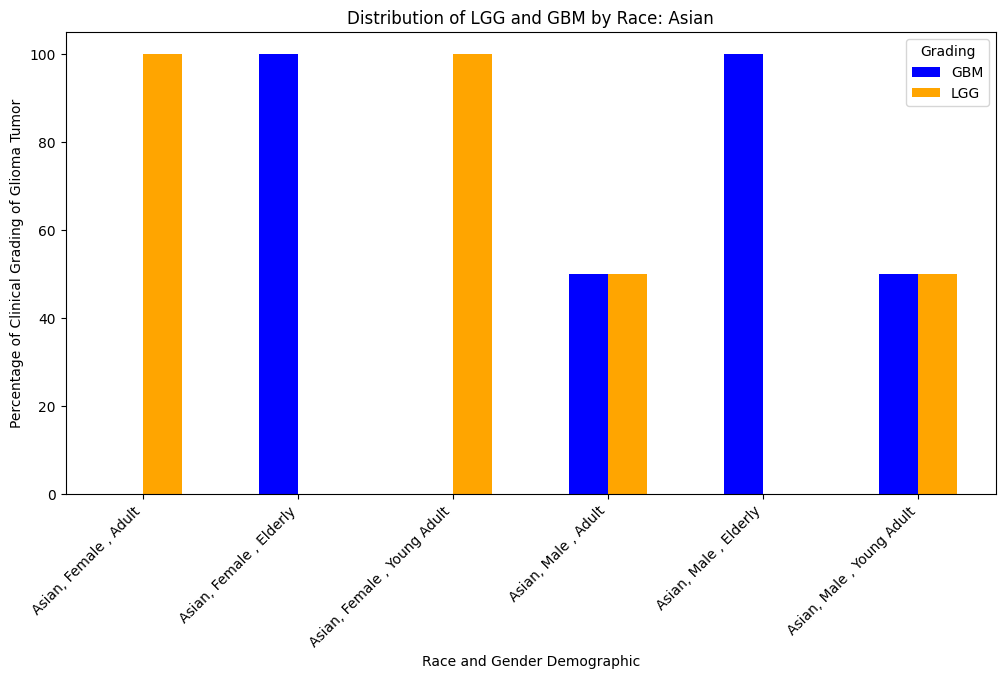

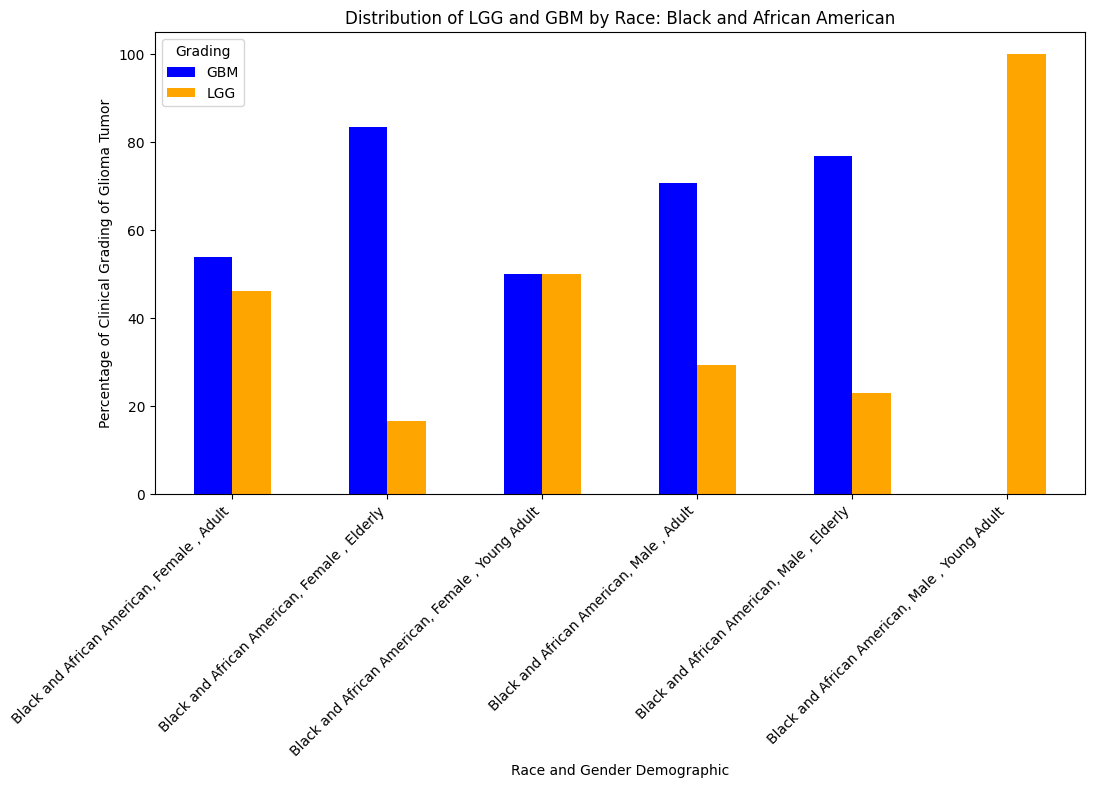

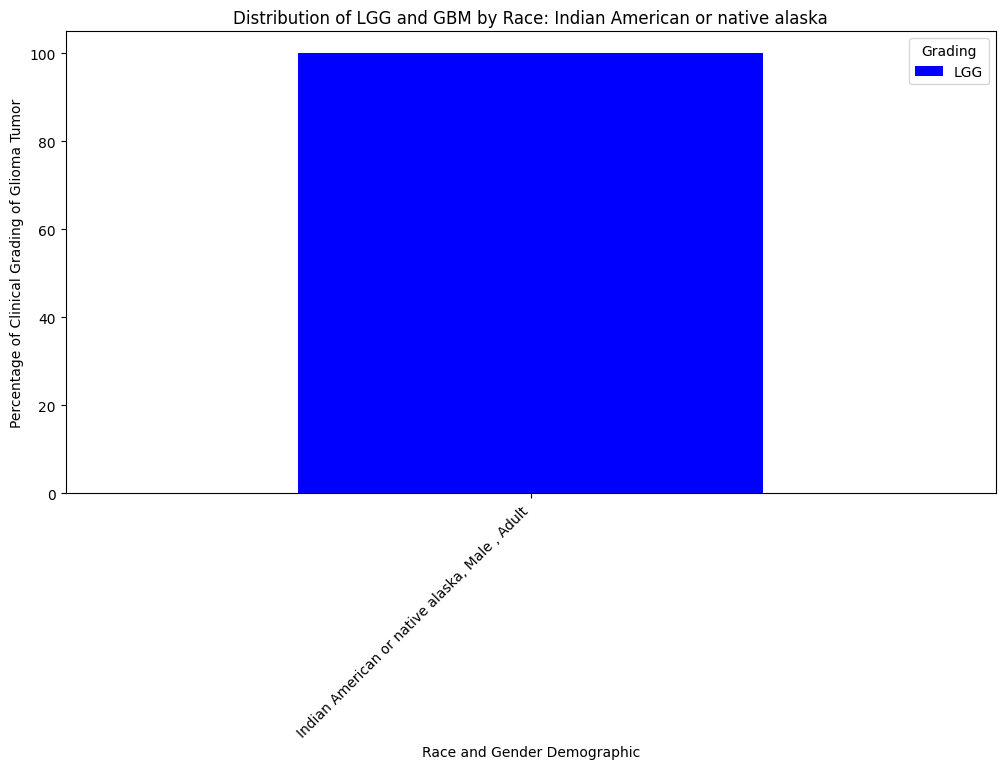

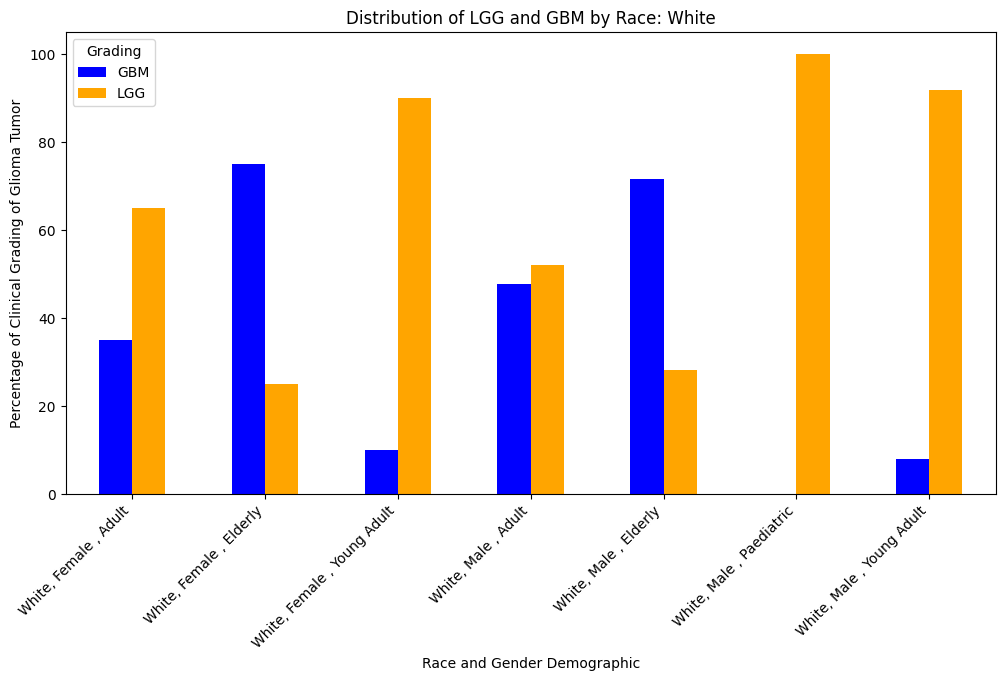

In [106]:
Grading_demo["race"] = Grading_demo["demographic"].apply(lambda x: x.split(",")[0])

# Separate plots by race
unique_races = Grading_demo["race"].unique()

# Create separate bar charts for each race
for race in unique_races:
    race_df = Grading_demo[Grading_demo["race"] == race].pivot(index="demographic", columns="Grading", values="percentage").fillna(0)

    # Plotting
    colors = ["orange", "yellow"]  
    race_df.plot(kind="bar", figsize=(12, 6), color= ["blue", "orange"])

    # Labels and title
    plt.xlabel("Race and Gender Demographic")
    plt.ylabel("Percentage of Clinical Grading of Glioma Tumor")
    plt.title(f"Distribution of LGG and GBM by Race: {race}")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Grading")

    # Display the plot
    plt.show()


**Populations in the dataset**

LGG and GBM:
- Black and African american adult male and female
- Black and African american elderly male and female
- Black and African american young adult female
- White adult male and female
- White elderly male and female
- White young adult male and female
- Asain male young adult
- Asian adult male

LGG:
- Indian american or native alaska adult male 
- White paediatric male
- Asian female young adult
- Asain female adult
- Black and African american young adult male

GBM:
- Asian male and female elderly




**Missing - unrepresented groups within the dataset**

LGG and GBM:
- Asian paediatric
- Black and african amercian paediatric
- Indian american or natice alaska paediatric, young adult, elderly and female adult
- White paediatric female

GBM:
- White paedritic male
- Black and african american male young adult
- Asian female young adult
- Asian female adult

LGG:
- Asian male and female elderly


***Alot of populations either missing or missing within a class of tumour - bias towards inaccurate tumour grading***

In [142]:
X.groupby('Grading')['demographic'].value_counts()

,Grading,demographic,count
0,GBM,"White, Male , Adult",99
1,GBM,"White, Male , Elderly",81
2,GBM,"White, Female , Adult",55
3,GBM,"White, Female , Elderly",54
4,GBM,"Black and African American, Male , Adult",12
5,GBM,"Black and African American, Male , Elderly",10
6,GBM,"White, Male , Young Adult",10
7,GBM,"White, Female , Young Adult",9
8,GBM,"Black and African American, Female , Adult",7
9,GBM,"Black and African American, Female , Elderly",5
